In [1]:
import sys
sys.path.insert(1,'../src')
from grasscare import *
from GDMap import *

import numpy as np
import matplotlib.pyplot as plt



In [2]:

def GROUSE_demo_init(m, r, n_K, missing_percentages):
    U_array, labels, centers = U_array_init(ambient_dimension = m, rank = r, count = 1, clusters = 1)

    print('\n########## GROUSE initialization ##########')
    GROUSE_paths = []
    path_names = []

    labels = np.array([i for i in range(len(missing_percentages))])
    #initializing multiple GROUSE path with same starting point and target but different missing_percentage
    for i in range(len(missing_percentages)):
        path_names.append(str(int(missing_percentages[i] * 100))  + '% missing')

        if i == 0:
            GROUSE_dict = GROUSE_init(U_array, missing_percentage = missing_percentages[i], observed_vectors = n_K)
        else:
            GROUSE_dict = GROUSE_init(U_array, missing_percentage = missing_percentages[i], observed_vectors = n_K,
                                        U_0 = GROUSE_paths[0][0], U_0_load = True)

        GROUSE_paths.append(GROUSE(GROUSE_dict, max_iter = 1, eta = 1))

        print('missing Percentage:', missing_percentages[i])
        print('\tDistance(U*, U_t) = ', d_G(U_array[0], GROUSE_paths[-1][-1]))

    optional_params = { 'path_names': path_names, 'Targets': U_array}

    GROUSE_paths = np.array(GROUSE_paths)
    S = []
    for t in range(n_K):
        S.append(GROUSE_paths[:,t])
    S = np.array(S)

    print('S Shape:', S.shape)

    return S, labels, optional_params



########## GROUSE initialization ##########
missing Percentage: 0
	Distance(U*, U_t) =  0.5479662631443324
missing Percentage: 0.5
	Distance(U*, U_t) =  1.4804366129992335
S Shape: (50, 2, 20, 2)

######################### Grasscare 1.1.9 #########################
Multiple Time Frames Mode: On
Reshaped S shape: (100, 20, 2)
Found the optimizer with 83 iterations!                        
Optimum Objective: 8.370539625105819


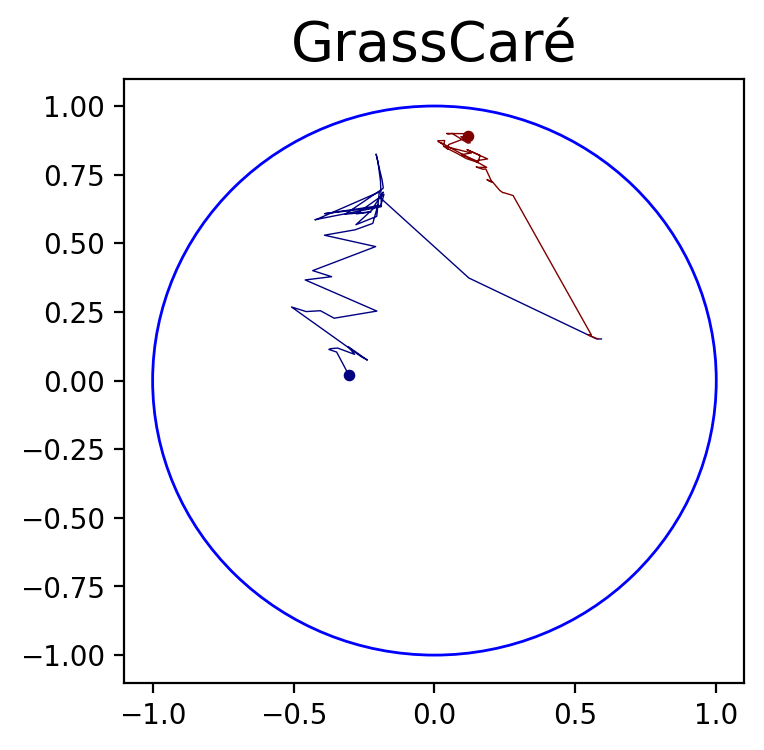

######################### Grasscare END ###########################



In [3]:
ambient_dimension = m = 20
rank = r = 2
observed_vectors = n_K = 50

missing_percentages = [0,0.5,]

S, labels, optional_params = GROUSE_demo_init(m, r, n_K, missing_percentages)

#optional_params['video_tail'] = 20
embedding, info = grasscare_plot(S = S, labels = labels,
                               optimizer = 'ADAM',
                               video = True)

#print(embedding)
#print(embedding.shape)




In [ ]:
ambient_dimension = m = 100
rank = r = 20
count = N = 60
clusters = K = 3

assert clusters > 0
assert count % clusters == 0


S, labels, centers = U_array_init(ambient_dimension = m, rank = r, count = N, clusters = K)

embedding = grasscare_plot(S = S, labels = labels,
                           optimizer = 'ADAM',
                           video = False, 
                           embedding_picture = False)

In [ ]:
diff_record = []
diff2_record = []
diff3_record = []
GMAP_record = []

In [ ]:

for i in range(100):
    S, labels, centers = U_array_init(ambient_dimension = m, rank = r, count = N, clusters = K)
    U_dist_mat = dist_U_array(S)
    U_dist_mat /= np.linalg.norm(U_dist_mat)
    
    
    embedding, info = grasscare_plot(S = S, labels = labels, video = False, optional_params = optional_params)
    b_dist_mat = dist_b_array(embedding, method = 'EuclideanL2')
    b_dist_mat /= np.linalg.norm(b_dist_mat)
    diff = np.sum(np.abs(b_dist_mat - U_dist_mat))
    print(diff)
    diff_record.append(diff)
    
    
    b_array_pca = b_array_init(count = N, style = 'PCA', U_array = S)
    b_dist_mat_pca = dist_b_array(b_array_pca, method = 'EuclideanL2')
    b_dist_mat_pca /= np.linalg.norm(b_dist_mat_pca)
    diff2 = np.sum(np.abs(b_dist_mat_pca - U_dist_mat))
    print(diff2)
    diff2_record.append(diff2)
    
    '''
    embedding_SNE, info = grasscare_plot(S = S, labels = labels, video = False, optional_params = tsne_optional_params)
    b_dist_mat_SNE = dist_b_array(embedding_SNE, method = 'EuclideanL2')
    b_dist_mat_SNE /= np.linalg.norm(b_dist_mat_SNE)
    diff3 = np.sum(np.abs(b_dist_mat_SNE - U_dist_mat))
    print(diff3)
    diff3_record.append(diff3)
    
    
    embedding_GDMAP = GDMap(U_array = S, rank = r) 
    b_dist_mat_GDMAP = dist_b_array(embedding_GDMAP, method = 'EuclideanL2')
    b_dist_mat_GDMAP /= np.linalg.norm(b_dist_mat_GDMAP)
    diff_GDMAP = np.sum(np.abs(b_dist_mat_GDMAP - U_dist_mat))
    print(diff_GDMAP)
    GMAP_record.append(diff_GDMAP)
    '''
    


In [ ]:
print('diff_record = ', diff_record)
print()
print('diff2_record = ', diff2_record)
#print('diff3_record =', diff3_record)
#print()
#print('diff_GDMAP = ',GMAP_record)

In [ ]:
plt.figure(figsize = (14,3), dpi = 200)

plt.subplot(1,4,1)

diff_record = [25.902412023408967, 14.181351882304103, 16.72940246893456, 14.911952433756834, 14.322321863459795, 15.307067251049755, 15.067699824782565, 14.505897543415006, 16.59303263561248, 23.838227601194532, 14.30491060318192, 14.688959353658776, 14.428389835425754, 16.691513594275612, 14.774560339670245, 14.547311129556942, 14.403165095252351, 18.535500967602566, 14.784269966320217, 14.710949820151615, 16.285650225513834, 15.918460042394779, 14.396182239334463, 14.787560608672718, 14.62708435195137, 14.355465857032247, 14.426658872663712, 24.134167450033484, 14.529357123095611, 15.545774752706034, 14.904561538875223, 14.31464488527283, 22.202429212289537, 14.690493261498997, 14.725010166644338, 14.735377630480963, 15.872205545179883, 14.707789998896788, 14.658068767611773, 15.931160562548587, 14.371692640367634, 14.906177439433225, 14.771667844562751, 14.981846782400165, 16.146016911741388, 14.78026517964827, 15.066985646856434, 14.921789795398809, 21.30430007885947, 23.581620746840134, 14.267441349540817, 14.599898950979345, 14.307212288020319, 14.403642852360338, 14.730126500756827, 14.549586096654927, 14.494462941033133, 14.59314129733515, 15.679710200214902, 15.003984717925452, 14.427587883274299, 14.771336645195541, 15.023409040134082, 14.597601249495565, 17.16259998301517, 15.979371149369054, 14.648561724665578, 14.523144525087876, 18.718408901525848, 15.927360166941034, 14.499289674656701, 14.782535184566335, 17.42171647773244, 14.174330096222178, 17.631089559994784, 14.74705440144271, 14.587552108177317, 14.618887142543723, 15.173681060556001, 15.370234486193766, 14.355013308371596, 14.948429613932749, 14.212514650895027, 17.227967720188172, 14.447263505375094, 14.786474572662744, 14.812885613767593, 14.335906259675173, 14.712623540011942, 14.5749665927297, 16.43528477095644, 16.369439228114924, 15.096303263641225, 14.928226618901435, 14.977422025979727, 14.60211652608557, 14.461070535853572, 15.126579854931123, 14.430842388585017, 14.846805104286187]
#diff_record =  [22.031446869817902, 20.28756794643593, 19.36206781944972, 30.473177262122515, 22.32616571432571, 20.295555588103415, 19.989502205086673, 20.246697418412555, 19.720574129952684, 23.093093091140727, 21.835268422396595, 33.05389018720781, 19.412259761164293, 19.848625622464958, 19.888073623060286, 22.82728992050443, 20.185892390133148, 20.55606422398532, 20.117101660779667, 20.269932528424583, 25.43166259109165, 20.654642462245874, 21.050898589808163, 40.02642031117783, 27.401256034042728, 19.23505088714805, 20.27971188876205, 21.82542332694215, 19.21421017431635, 22.14431567513836, 24.028181513594163, 25.25246713379067, 20.33829442211924, 19.84858723702681, 22.749825145148023, 20.14656340087512, 25.420191487074753, 19.509631280015782, 20.127209251086903, 19.761751450550047, 20.176216651643934, 21.386309381411884, 20.979496991750388, 22.535806432285995, 26.923849142370525, 39.42435387409327, 20.192356372932633, 23.553283159805684, 20.599999738553073, 20.171038666228295, 20.60664204692049, 22.749127462325006, 22.287595558901785, 22.78949898619016, 19.421977893863875, 20.691376116309875, 19.473908815087142, 22.576262973566138, 19.687741154870274, 19.310647227636483, 19.99734285703871, 35.5254226644693, 19.168561385330968, 19.887585242479744, 20.25597975453519, 20.486904260862147, 20.368801533083705, 21.037014384058203, 19.87090398737331, 20.2181237501207, 27.444760930878175, 20.25519147331063, 19.8876086769746, 20.289855358448385, 20.045865287240836, 19.93164890271821, 27.790848253900926, 22.15500524787361, 21.201911276533203, 19.423978192234305, 20.36129703061087, 19.7543977691317, 20.363808885206435, 20.612526660370822, 21.461094056700603, 22.19238060100257, 19.840990061095596, 31.245420225825974, 24.301855323913237, 40.95804940507591, 22.948148939981024, 24.705665021784974, 21.87344871339469, 20.276346895402312, 19.726084793103496, 20.647940882705893, 20.83115021809793, 23.078822031788313, 29.949699178484163, 19.750330368076437]
diff2_record =  [37.267557013955965, 17.811995140753986, 34.49443617288146, 37.025706226139135, 33.718338894578565, 37.73977410508678, 23.15340728046303, 17.532363542314656, 18.834989000868703, 17.79539532135928, 25.438169657324174, 39.56754659055925, 18.44822613061744, 39.43223511899865, 37.47726863700849, 38.1134260754093, 36.95337479219791, 25.459980940304632, 38.74978744267767, 40.49864104064211, 33.86955389430388, 36.673625645184806, 30.922031075493585, 37.86838857970763, 17.78449359911097, 24.032735941487452, 17.37260241937383, 36.562707233378056, 32.52090903850022, 26.615920502886006, 18.91744642495383, 36.02176371960718, 17.879848370016926, 36.00174382939395, 38.74630698384432, 19.427210549783673, 37.82446585204411, 35.57047799190133, 37.513367890966016, 34.62079145851517, 36.84359009126557, 37.37642766663019, 35.56768311680899, 34.02589273766066, 24.045884608397277, 29.789754765580756, 29.97681337212027, 24.8646001959757, 26.286060532897412, 30.036502803799753, 37.62825455747348, 36.85462352745534, 20.852388467229495, 37.10154587086304, 33.614919214650314, 38.99279101554258, 19.64260198856588, 36.34114274629835, 32.99465799036283, 33.67365538833137, 37.16527979534412, 36.344288834993904, 33.8275331721094, 29.422968772515624, 17.911362829425574, 38.314089288720204, 37.96018509235208, 31.397271278997522, 35.310801386519245, 40.192111653411466, 35.7283740336929, 32.985931252938286, 36.14727562751227, 37.89464411601596, 37.206875621588054, 31.14362281400928, 35.80534680862999, 38.429347561727816, 23.084723427093657, 27.062666878623524, 39.54492722750865, 35.99164741490653, 38.47499289704719, 34.40137308900428, 38.41897981530926, 36.675778701018956, 22.88875241450674, 19.16757886375366, 27.831699106254554, 38.22155318591438, 18.052989213900076, 36.14279929918003, 39.362412589419236, 17.907002757945587, 35.9235733434479, 39.46630602918548, 37.357231833367976, 40.14329768525755, 35.256180490349486, 24.4283523461251]
#diff2_record = [19.4361429858579, 31.21863198384223, 30.188140573816376, 25.923589724652953, 19.669907069447113, 28.618493338521073, 17.95715919628232, 20.097021243755112, 25.625128436844303, 29.076564133182774, 20.550261245671717, 20.237144259272604, 19.188506858530584, 25.18900493923745, 21.234037632904084, 20.40138424977455, 26.033349627909416, 26.238969672947967, 19.934749332284696, 19.291238089674096, 19.298478599155885, 29.35134618052438, 20.428345940683684, 20.56651574950922, 27.996856632097803, 20.956984366678938, 21.2859601482973, 23.775730711299673, 16.89072870908295, 22.976244160520707, 27.64669211567704, 31.56496304654945, 25.371604787357146, 27.263620614480097, 28.76584356658022, 27.804193629199013, 18.582787623473585, 30.484714013602286, 26.314275106877588, 19.698951096241906, 20.00194630750518, 31.789489859615504, 21.293654690807916, 21.589125952075783, 30.820871470050722, 23.865453184292683, 18.321796264722504, 20.664003752173947, 24.861553271474378, 24.494576548133768, 21.04758692202566, 20.591738056716682, 30.392119403109945, 17.03596820448569, 19.504396859460936, 28.635132779007954, 20.8248900583499, 21.172245289800806, 20.03128398653559, 21.229040966111704, 29.51163667286052, 26.75000077387279, 28.73555245265922, 25.24320671581124, 19.724181366746002, 28.45944422529188, 24.545506587448926, 28.43634683800145, 28.48479221089608, 19.528484299249893, 19.07683559831142, 25.847072805784737, 20.279212036900955, 17.518602486007268, 17.320106151251366, 20.002017900423816, 28.150638409549405, 24.256415671310467, 32.438363141101505, 21.18134874516432, 25.986642375857947, 31.07529836957736, 19.245248050337132, 18.413527282209973, 29.34084169642683, 18.74578263935909, 22.61525844261356, 24.357374723545767, 18.94143888935954, 26.50346385937098, 28.611331864640455, 33.310677241038874, 28.240200658245257, 21.339255000057758, 20.164673302642825, 26.93528078796182, 18.900130541351714, 23.62501067367447, 18.30085542194286, 19.020054382263584]
diff3_record = [39.31630296381489, 19.750264244694534, 18.902950079624055, 18.906773306763046, 31.203175976086804, 39.57890683186342, 23.9422801007497, 17.921173767558457, 18.1387166455916, 20.021609995662267, 28.550232416839563, 23.23177429892006, 27.515295420112373, 21.404730651437397, 18.941706841570927, 18.41687152268063, 25.973889570117052, 19.243148574144474, 20.626811529801955, 21.03540675467895, 27.172268632530496, 17.50048654071127, 21.15743498392831, 17.946534113436744, 18.813554656672913, 20.387023528552415, 18.283237432984222, 19.07646984959875, 18.899687462038344, 19.300195293349965, 18.896310976774117, 18.260644951937568, 18.54582205024708, 19.252877088416817, 18.206853383474055, 19.344831101268344, 18.89487454191029, 18.28846632624816, 34.85685943576077, 18.35865393721073, 18.125070553049945, 18.495361030234687, 19.33048139557848, 18.366646356481503, 19.46556332816141, 19.760205938466157, 19.268548499897747, 18.331809080014857, 39.91057180460715, 24.24180821621171, 18.680761495284735, 18.735905726766724, 31.127675355789343, 18.646292456851604, 18.246993880069702, 19.499922770541847, 17.76516209288217, 20.291332627031856, 39.54062349132333, 18.321969652485983, 20.455567405244132, 18.567046000390214, 19.738636653813863, 18.357446176205766, 18.1961174531, 18.259459688015305, 17.647595891672008, 18.238845735156165, 23.6154329480526, 28.72991486299239, 18.109280991134778, 25.340768410134014, 21.58111825149101, 37.947945078211646, 18.161679966812077, 22.810980548138204, 17.977152307750437, 19.82835842580453, 34.52230334425738, 19.1593226132361, 31.0965046943802, 20.66559903104237, 17.69968538212082, 18.21914854482544, 18.35104044986466, 19.41483024745512, 18.473945690716832, 19.334161626969802, 18.715286608996855, 18.928089294856505, 18.89377250456659, 18.804409370658888, 18.152300126870553, 21.22024539384086, 20.160757869276352, 19.14971065029927, 18.843667129649496, 18.809215973069335, 18.444489671684387, 21.8338835922062]
diff_GDMAP =  [40.608791755589934, 36.83317106572294, 36.85064226949087, 39.321151409006454, 38.62300005134536, 41.12312126174785, 37.574075807533106, 37.74203964963772, 38.31776664619042, 40.6720256372206, 37.45350481851757, 40.86007315581615, 39.2590826714261, 36.93694533898036, 36.68365974515652, 37.84874836628342, 36.82343423937941, 38.473428046614586, 37.3467671703609, 37.32448144056856, 37.417186348237585, 37.38105064722055, 36.213681083703136, 40.40275500372964, 36.60380314375027, 36.75611968708974, 36.834288239613, 37.52665077263073, 40.897893744896294, 40.88983100634458, 36.739560432051164, 38.726551103768934, 37.266442924874944, 40.60611681558336, 37.13418416138251, 37.219715790468825, 38.74196541992144, 39.83425855637025, 39.748322738158265, 38.412235408098816, 40.36284306759255, 38.384620165378024, 39.56971088217444, 37.75565088339697, 37.43413085231079, 36.74930260580334, 37.28501705525757, 37.51040926411113, 37.398025471586735, 37.79340673812135, 41.295996038916854, 37.44950229544269, 36.116243313897044, 40.638191611202295, 37.19425165767421, 36.849953255328465, 38.798847176243825, 38.746869837814806, 36.776995143519756, 36.631311007037226, 38.308213115695736, 36.637026174781596, 40.261511338492255, 36.91911474312963, 36.945794236132386, 39.199058119799915, 37.80701860071564, 39.78475708922414, 41.25484108927717, 40.63995023432494, 41.025892025226746, 37.61251621380303, 37.962543174211966, 37.98945869642814, 36.82424229795069, 37.576181894514455, 37.00091899956723, 36.72314136438524, 37.15371510052519, 41.21939754024657, 36.53886912643756, 40.93165522082155, 37.24504158063595, 39.84098360461847, 37.53106786154689, 40.08561638129012, 37.12900765785139, 36.50283528637742, 38.31408198575683, 37.1838802743237, 36.88872435371465, 40.57901510699331, 38.35703149735116, 36.8259191637388, 36.98448549889351, 40.836297788731414, 37.65857361055821, 37.11352267830475, 41.22155214574951, 37.38948819898212]
plt.boxplot([diff_record,diff3_record, diff2_record , diff_GDMAP], labels = ['GrassCaré', 't-SNE', 'nPCA', 'GDMaps'])
plt.title('m = 50, r = 5')
plt.ylabel("Representation Error")

plt.subplot(1,4,2)

diff_record = [16.28779132474011, 16.405678463847472, 21.49418352392901, 18.728320131436504, 16.251709465204605, 16.74202917169002, 18.20502608559599, 16.992522197876976, 16.406052183639705, 16.324870632314227, 16.499632192664507, 16.741644976580538, 17.019410832983684, 16.674523048422152, 16.337214471832255, 16.332520161769867, 20.864467054760404, 22.496864055245794, 20.037629159594772, 17.407440268620164, 20.320056662588378, 16.22584180081467, 16.576248183137203, 26.1711161052829, 16.440130916193883, 16.62321037790229, 16.79899182534599, 16.30285854928873, 16.437384809513496, 16.472324897906155, 20.168491691096342, 19.589983490800662, 16.691582923395615, 19.37187533441706, 16.391967586685993, 23.912686266374152, 16.403269887311815, 16.895104964727437, 18.349739013203035, 26.600944210065904, 16.4793340318416, 16.42640856980381, 27.124265197493983, 16.643832356202218, 22.464969475196483, 16.49055805544871, 16.470392786507013, 17.100513809203733, 17.580339263844646, 16.579802338850257, 18.025410888845453, 16.459527380992988, 16.319537571422675, 16.119229086596924, 16.618861208301038, 16.363136018310563, 16.665851615672874, 18.061519827235617, 16.546025494206546, 18.29259398839325, 16.663037339387127, 22.343042881507827, 16.37290355474051, 18.8180413715641, 16.29186156059149, 16.34256791365152, 18.453593752772775, 16.55027229231799, 19.221947723014395, 19.86753256724284, 17.569762887958852, 17.98952984271277, 16.552229923930007, 16.4648437470206, 16.50301804166609, 16.190747858933676, 16.44373857548745, 16.233982340157027, 16.77924547676868, 16.285883492617657, 16.726652993325494, 16.48052237846338, 16.483761030327116, 16.157835381908697, 16.657577164747035, 18.9717601190134, 16.242727924465694, 16.883595717615446, 16.54024356086228, 16.432491378697605, 16.353358347663118, 18.820960848357647, 16.430202013469636, 16.716206772545984, 18.148077677397673, 16.73629444226079, 16.84581822613393, 20.200110871894825, 21.479052390453095, 19.03670781222327]
#diff_record =  [21.407634941861353, 29.42804450940377, 22.988663408150764, 21.701801710352534, 23.94897962404599, 20.788741897356594, 21.827515110086328, 25.970860180237622, 38.40019676265447, 20.50855208457226, 41.56190342272622, 32.64950041434069, 21.783727364638914, 23.639938570565, 21.74204066903923, 20.631545686590503, 27.987095025349078, 21.36643141314559, 21.062278239492137, 21.158341525389847, 28.73456314870817, 21.201704061487572, 21.398595220331202, 22.39493041764479, 21.329414277352857, 21.379193952479028, 21.549745892966023, 22.50950173342813, 25.222754936111983, 21.448809214310025, 24.861099116093115, 21.16473949233805, 27.184435995232384, 22.448452820391015, 36.99998834934078, 21.851479333499732, 22.185372058741066, 21.41397517129112, 20.71556133304268, 23.997218140743197, 20.657649129060996, 21.42847166973337, 21.862718843961908, 24.641352455223483, 21.601687071601575, 20.86824607333147, 21.278244664003726, 22.121531177561025, 21.194367163116596, 21.230459696550064, 21.946761660935643, 21.306552177398885, 21.550514299492292, 22.675399869202433, 29.86935836193948, 23.2268203200331, 21.090262217463977, 22.767885128021277, 21.184414721604274, 23.480764055475174, 21.099917195544528, 22.298548953918637, 22.141716661774765, 21.54829434171796, 24.36692875315388, 25.148354599491114, 31.436614760092368, 22.88835778771874, 42.12491330760637, 23.1532932984179, 21.179819221038606, 23.307929972240725, 22.508662117037268, 24.656805248911805, 22.204539012100206, 27.934187912799285, 21.759116776671696, 31.554950799592106, 24.774854105548386, 24.72567290388096, 23.18804402367515, 21.056478465028597, 30.81532759696949, 20.761456685787152, 22.177547361735932, 39.27173511756076, 30.7738126110719, 22.477981497051704, 21.704495803409273, 20.792156805875365, 21.825757365769228, 21.51092310568841, 41.19188456075457, 21.90508546931519, 33.185606909525056, 41.486755317242554, 22.37786391285354, 31.55202438580544, 20.734632893284203, 21.378958596148934]
#diff2_record = [20.2518982426887, 20.770069061215658, 31.330115928478875, 23.639689164885677, 21.567281149142318, 23.719929964433856, 31.646623573925112, 19.887192866882472, 23.51527522936247, 28.278987331629498, 31.642195598758114, 18.75705471693002, 27.222348162245964, 26.426165052143556, 33.31229234050803, 32.82885648534182, 34.34838878148907, 34.06268183414744, 27.585437799917145, 17.5495362262246, 33.44653613876508, 22.703215240748904, 23.41589461840475, 32.78508647330867, 21.295700132060578, 22.230805582668424, 23.156289938308436, 28.562012315668234, 31.79631626092958, 18.663892611193173, 21.200940012016293, 23.605004844818627, 32.27676049262827, 20.5854784293079, 27.031106255600378, 21.422030947135028, 28.58972816819052, 29.90857775221933, 19.147122519390948, 23.63664736476006, 21.643352175322484, 32.35664087659982, 19.574836924471963, 23.826957884412842, 22.600472556928594, 27.681492921790966, 27.171602424346847, 32.19790420656151, 20.758262093207705, 28.408015580935587, 21.196160776470133, 20.897934570721567, 21.47756161343305, 27.192701379508115, 26.446243343942072, 33.40232573360364, 23.677941073418104, 22.472272551550674, 32.00722289744906, 33.725158979807404, 28.62740586977722, 33.50205447563265, 34.104582049679635, 24.806532432219868, 22.087883735801746, 21.837991622659526, 28.545851023343197, 28.632256197834167, 35.82966870393088, 25.689308525679504, 20.989502618151654, 20.344320618067506, 32.694021075145216, 21.164934174287772, 28.082402006945365, 20.167279687099672, 32.9936688936574, 25.242289146577452, 26.546272677246485, 24.621467000124667, 25.300470107122997, 28.96295158517793, 24.304930147549726, 29.087272137112357, 28.450873799100677, 31.307368577569314, 32.76507448399604, 31.49499723728767, 27.367880211618623, 21.20899567010787, 27.782523367755168, 34.83187134108228, 24.70256991217734, 20.799931105959992, 27.960766901771347, 23.545589747859303, 23.35403035945953, 32.55053445043442, 29.32890283687485, 33.077116541074275]
diff2_record =  [31.85152914227522, 39.565704011635844, 38.83623151217159, 37.74362900460898, 38.58460946808111, 22.714500708338946, 36.06218875714349, 29.477429282506847, 19.13587025935585, 37.75996725619348, 29.587128563091323, 39.09443922843354, 37.94468732647008, 39.37298546286556, 35.642016624007724, 40.127976049451505, 39.388792560791586, 35.35242242949123, 19.24320722311326, 39.47613060615643, 39.13999822676374, 19.33101209451071, 38.09010816766376, 38.85162061026132, 33.34829407799074, 19.19422427919408, 29.487356752671815, 40.86803986893871, 36.8862789443579, 38.30574644551486, 36.661710889004404, 38.042046257397615, 39.42434171199507, 37.292104895381996, 19.499956924214743, 37.20729194278482, 33.31725728151758, 39.7846921336375, 37.89527168566056, 19.299272712700137, 39.257835821562324, 39.335686808351056, 36.52342297935589, 36.92443681673552, 38.68643822480036, 24.483683425585113, 39.57624327359859, 37.68478299158643, 19.924751488396037, 37.16868974935646, 39.52206986277524, 19.120110466273474, 29.503984222276486, 30.12306469119404, 40.686770558377944, 26.573337767458224, 37.8152830850849, 33.75774745208738, 36.84343171435793, 36.39785338706427, 38.70080011188874, 37.14016702954382, 41.62150606367699, 19.271070830353423, 40.76928238901642, 19.49775930393087, 41.04231244309413, 19.23659785691644, 37.80880131699996, 22.282663775970732, 21.46937257430512, 39.29348329443896, 38.29974318581944, 19.39336846297327, 22.0733312702463, 40.961210635157585, 38.78817027229729, 37.32819742457317, 19.42290000501352, 39.590122415618495, 38.99789532733784, 39.69085742921471, 30.27487570204523, 31.033091199455058, 39.31895099195505, 39.764856036891956, 38.214848351196565, 41.14989024946783, 38.49294469734252, 32.47390919285833, 41.45952458007534, 19.1704950896579, 37.26138801326062, 19.976903607236295, 35.160260460423686, 38.42603977009074, 28.442960026966183, 39.44979614628194, 39.115597230957995, 39.595034187522934]

diff3_record = [20.728611548712593, 39.89141647226464, 20.017828428968876, 32.89286125606077, 19.83631091468506, 23.02036512415209, 20.4149084058064, 19.876718283211687, 20.10129157956388, 20.312957325219735, 20.650381758976152, 20.610097456213573, 20.59228910858357, 19.714307291680143, 19.590598152497414, 19.63120370959419, 41.22848287674665, 20.531011242780465, 20.138634758518343, 20.878246308220053, 20.50009958573684, 20.8749419124365, 20.10415361568613, 20.038323943092085, 35.28240131198618, 22.27429585922282, 20.701566587349333, 21.10864015373631, 19.87070521972808, 20.308539334556798, 41.93372551902077, 20.122858146106267, 41.9598344719503, 21.386772093055555, 19.846860958354505, 23.742921297519636, 29.70321494573077, 20.9159809462058, 19.819811320738392, 20.64074490917458, 20.07768808755837, 24.573197179727696, 23.192881214693948, 22.58318651222588, 21.78269678499794, 37.99646043726817, 36.67201477641362, 19.94489181969721, 19.8683016980606, 20.969626281373856, 19.78179573052531, 40.28360994502791, 23.765230403044356, 20.81611849644055, 20.329111900925227, 19.817568314678137, 19.861655207145947, 41.88790772252933, 22.493464372763892, 19.85819309559964, 30.763675686340065, 30.278264676655127, 39.86671797007006, 23.784292212210346, 42.38375334291121, 19.75077225222494, 19.68798065414041, 19.64964312945226, 19.633841621029923, 27.3322726853345, 24.2218319611589, 19.982363450270313, 20.197057388582273, 21.910168542873194, 30.50186579649916, 29.59557244169863, 21.985421492690303, 19.4118633027036, 24.42595828464792, 19.44370411335496, 19.860546045586545, 21.58997257411772, 24.38219547171564, 34.25120815734673, 20.332821933309216, 20.609932549381504, 20.099490533346657, 20.301093189249592, 19.839234024303735, 20.158095643916013, 20.332801472823093, 31.338453275758425, 20.809912698814742, 39.47746105150848, 37.79951944153005, 20.24785329479143, 36.139543709001785, 23.54836110552308, 19.801563656632744, 40.128450365038276]
diff_GDMAP =  [38.54907624656447, 41.763122170953196, 39.002061021915225, 42.43940352262412, 40.79064826283823, 42.161650747321964, 38.318475945524284, 38.502706025566226, 38.84318759143155, 41.320646533635234, 39.17743161363864, 38.3126398066157, 38.538237215344424, 42.20363717125818, 38.3805155414072, 39.56692189998944, 38.16228782903374, 37.92926808157516, 38.03934123443811, 40.34768594516462, 39.2934984226271, 39.007758358914714, 42.16783597171157, 39.261689966369836, 41.60768964342989, 41.14256061771452, 38.83977157166652, 38.91101165135501, 40.3923193496868, 41.91561728766612, 41.13468988833377, 38.62804859438199, 38.30777907518217, 41.67799697014658, 38.1063531073933, 42.06854680364681, 41.298308769914726, 38.357279187094605, 41.6746168107972, 40.41837824895689, 37.99763167682363, 38.822322232848265, 38.277991981246515, 41.961120484869596, 38.9414676897398, 39.423497496554006, 39.35303400378179, 40.72185226757266, 39.36226415828084, 39.29757943867358, 39.32270373531555, 42.248506817319274, 41.34823667584297, 42.15739483503451, 38.461815094245885, 40.444736278055984, 41.642987190327055, 38.359156363797, 38.445100704984995, 38.41692426407053, 42.1442452568032, 42.29096569889192, 39.59378053928813, 38.97684411775779, 39.060500428006634, 40.62162018530661, 42.23918034613933, 39.591029739215486, 38.1309820758538, 38.97468803882708, 38.77070430282954, 42.33485999708336, 39.399643426827595, 41.9137221795164, 41.62376397625259, 38.87932059369721, 42.254230762409755, 38.43479362332069, 41.22980075640419, 41.09990585803004, 38.29186477439882, 38.490165984065726, 37.89192403391233, 39.97521359461475, 38.23032379592604, 42.088470974603496, 40.339961904286625, 39.179413736854116, 38.96456942698558, 40.552866138563125, 39.28572095966813, 39.62966015051862, 41.896092895091286, 39.29959751851097, 42.21573142242481, 40.77149366857074, 41.42504854103231, 42.19264418493461, 38.930853315176975, 40.466676066701815]
plt.boxplot([diff_record,diff3_record, diff2_record , diff_GDMAP], labels = ['GrassCaré', 't-SNE', 'nPCA', 'GDMaps'])
plt.title('m = 50, r = 20')

plt.subplot(1,4,3)

diff_record = [18.18014005088525, 17.213987884450404, 19.162019435046716, 17.163535918807888, 19.146856825882807, 17.295068505252008, 17.035400026961288, 17.087025300188156, 17.40370141432216, 17.696375186892023, 17.48225634735106, 17.35864462509193, 17.543111911924097, 17.679938861020474, 17.38694490871335, 17.35224951780221, 17.535262671937296, 17.53675526608425, 17.633593237028794, 17.46737343422759, 17.223144975690303, 17.244863228215884, 17.04978646197145, 18.153714658291264, 18.037280774034326, 17.31029277477864, 17.43331779662822, 17.860421797719617, 17.2254320605263, 17.221459536838736, 21.06319801786772, 18.038675518032534, 17.8694668974818, 17.19631070157272, 17.535793623370797, 17.825340491362603, 23.941704629018695, 17.961455716215475, 17.833839794834415, 19.777656442240186, 17.084702820863036, 17.320198200288527, 17.278063639946453, 17.334467729955364, 17.836595217750823, 17.09576353201959, 17.33345496872338, 17.35521299021927, 26.191507081332645, 21.585386824570993, 17.382935868261022, 17.5743521766554, 17.424629398829218, 17.62348161611161, 17.322552026933195, 17.147265615931786, 17.178600755499136, 17.316797945458042, 17.314151597755817, 17.359934840506476, 17.084235232527856, 19.452232342666342, 25.785341185564178, 17.237642229339702, 17.429033569526037, 17.57687938686362, 17.490084746634494, 17.40013312409848, 17.56012079920349, 17.39885440132499, 17.067576584346305, 17.935656511268476, 17.418482275999146, 17.277542548497856, 17.25362945003387, 17.48759722038594, 17.272550884499307, 18.265401104581493, 17.358361249264803, 21.564798848061145, 17.066423317321632, 17.83798573022541, 17.418792664679785, 17.615836123065574, 17.585940283967545, 17.21565856962019, 18.651005241237037, 17.490288015845294, 17.42148786487882, 23.361608647417853, 17.348020743335212, 17.17633540793628, 17.257162817034462, 17.45419924651935, 18.940924637994126, 24.31211432054714, 17.242787726830198, 17.44758535447643, 17.213652128207826, 17.206340835270396]
#diff_record =  [24.936352061367383, 34.92528116742468, 24.004360963601655, 25.0628656545611, 25.797239133087267, 26.986038362993813, 27.23704962184452, 23.534096251579342, 23.604590604180217, 25.610161148708, 35.950150425306276, 40.78684591223159, 24.09942894203534, 23.599934729787766, 24.828153450992154, 24.536588605832556, 23.36367639169096, 23.870141086687106, 24.974479625920004, 24.027781434603384, 23.928461347277054, 23.40000606612444, 26.848452130856728, 24.901920716753114, 36.76896851489954, 27.75318708066808, 23.917182053972653, 26.81696852976817, 23.70963897842586, 23.612140848178115, 27.752167529665144, 23.64948439457136, 24.425493441478316, 24.88383902080212, 23.3258061981604, 42.20594125674931, 23.908763085861548, 23.633600938552355, 24.571703988842053, 30.439120952183142, 25.670534117137773, 23.458812855832416, 33.41051408362179, 34.08383277747752, 25.100648408280797, 24.457549988517272, 24.252981830035456, 31.8123577773119, 25.17278944376286, 32.51635994206399, 30.97847262907478, 31.22120225884478, 25.29458306731453, 25.014057678470444, 31.59855966945954, 28.532348020575057, 23.913517500138013, 27.74783198427525, 24.340204133658414, 23.794859094083673, 29.648815030685334, 23.833799001157814, 24.6033802041312, 23.920302430329713, 23.673574510651115, 23.11548894946256, 27.639405732021437, 24.06588104166421, 24.884076633996017, 23.084688387706244, 24.02829671877437, 42.06566862058753, 23.74398230379507, 25.825585464173038, 24.760342942830416, 23.437074567425313, 23.514830802961455, 23.703860322040136, 41.40096970563762, 23.788906884237182, 23.73398212041187, 23.723285886595093, 23.188329639856132, 24.55097822858759, 42.26896352266148, 23.823809194595746, 27.267465815709567, 24.437162688627915, 23.630352430764365, 24.370353170988082, 23.733397042474152, 23.8098304892385, 23.188348479837785, 23.82376501877358, 25.27082777067305, 24.6089728048102, 23.796603490883996, 26.115976237897627, 24.359832720565393, 23.981730571025324]

#diff2_record = [28.365006333615735, 33.824197560429354, 29.59307713873568, 34.035227237416976, 21.88840861925555, 33.23014709833137, 27.47685089554738, 22.850515768835905, 19.754620002549657, 31.953330721603013, 21.63226558063868, 21.30472598024329, 18.230051328870626, 20.731747331922616, 25.25058405699283, 20.17930476294051, 22.311119742774935, 30.27023012361084, 32.012378351822775, 29.987308340506736, 25.221190021338394, 29.997656372778977, 25.257186081535863, 26.911533143165347, 22.39552824080839, 34.40763246868815, 19.982411513183454, 21.230285549382526, 22.171649059599446, 21.138637670711283, 22.524039151267882, 23.18336016938807, 20.72106049697566, 25.47243635643214, 22.76834523503998, 22.762011085935605, 22.097425493804202, 29.007413596295237, 20.562653014675348, 21.605933038616378, 22.899639208563443, 18.7908296769264, 21.216452526348437, 34.13420318496043, 23.698563773373905, 30.206836480840057, 22.1650631252098, 22.693649079313246, 33.6367179119155, 32.83358902244412, 23.33274084193626, 21.66094813944123, 21.9362164121101, 24.654717143116464, 29.037577315931962, 28.999144804208427, 22.19946029242147, 21.637740358781894, 28.697994181223095, 21.31502743313959, 28.379333542017847, 21.613783986984856, 21.969739247314983, 27.31208765868069, 26.589582975125122, 21.462583395223042, 27.3971708678706, 26.646879423424572, 22.217170750831862, 24.085620868266894, 19.2292802664448, 20.159076347184737, 30.606842398323167, 20.506173622701837, 21.482915763867922, 26.164238783753333, 21.05663502935106, 21.0708913374706, 18.483904176502296, 24.1993629129138, 23.27272445668695, 27.912030281924714, 31.07375499708164, 31.51118597408847, 21.249353024545595, 26.59704121363904, 22.414362665648312, 32.95571155000028, 29.14313387978779, 23.34199447913201, 31.830931503539116, 33.83699721035581, 22.16874394790473, 26.20293213781099, 31.31395849102603, 29.910596806862966, 27.570704812553505, 26.539691793199125, 23.357013180568913, 21.35067954956116]
diff2_record =  [40.975569273604904, 38.567705053938866, 36.621527114243, 21.03329683932038, 20.757190583368338, 37.57221034123303, 37.68244889992603, 33.06182563145798, 40.532106326554725, 29.39879222767474, 39.336097644062676, 40.01840624115742, 40.84909274042898, 37.855702159775255, 23.9274027981521, 31.61838208803171, 35.72214265984006, 33.31599702871236, 20.99012385524135, 21.012179910736286, 37.04378813911211, 42.1287715906915, 37.756961437726744, 31.94241873824946, 29.945035648151354, 39.28164743582933, 33.2519073042057, 34.35094840485351, 21.400546423868242, 21.002824440789567, 31.291473513836607, 39.604500509711855, 37.68404969003651, 36.20766540406707, 39.02290691065652, 40.711529945643605, 20.614600559990087, 38.81196167938002, 39.96787152352933, 23.336062114184912, 37.6721908570442, 20.865814207602256, 41.90637765108983, 30.345587530194024, 37.336213393882716, 39.653342845764115, 38.938253825412104, 25.62408286237566, 38.42769022256702, 36.55943056143105, 38.38171148275376, 31.2564925728501, 39.58836767629201, 21.65361647356999, 39.4158955177554, 35.53851540966859, 38.82333429220725, 40.40673543177044, 40.24631432730691, 21.420307448790567, 35.74956283275291, 38.6275975159707, 30.101053621990907, 39.28071032237269, 35.19803717575313, 31.19553203664318, 32.63979985217939, 20.954864874112218, 22.461644605980226, 20.64365305257006, 37.50565134312817, 39.60054961810309, 22.35642747005964, 40.21214803282561, 20.826084096013204, 20.793712615083116, 40.03215532409202, 38.727532618066334, 20.710243988845264, 40.15791986949395, 20.839927712856095, 38.95761418173056, 37.12305446818413, 39.23589816150951, 20.875930309899754, 22.660220166256472, 24.746414390888393, 36.812616872217745, 36.32662995837472, 36.62347622596859, 21.101826151342486, 41.59135836901758, 39.583086611312204, 29.717212890427554, 34.1986983993818, 39.92484143887638, 39.551795140106286, 39.05729227558493, 28.63783227309124, 27.946976556635356]
diff3_record = [24.608662113195706, 41.96138754677541, 23.24466866601994, 41.65986117044757, 23.28441748786669, 22.76736069691377, 22.515172788801635, 22.289038189941312, 23.126375135398156, 25.285668592580222, 23.767379045138902, 24.23537643152565, 22.743623415278996, 25.465079535460127, 22.884026968090275, 40.640920990947265, 23.098615111953976, 25.547451526630496, 23.307316744458912, 23.133568179785907, 24.122387844748022, 24.83104373273997, 22.650303563043707, 22.737427798297368, 27.5449985704623, 22.43077474979774, 42.00995983107679, 22.94328113050352, 23.007566368138562, 23.020400467316875, 42.19444494779714, 22.942551142122056, 22.315878303401696, 23.38839504711696, 23.561180382382, 21.928381031078963, 24.2617990121294, 32.87166182714764, 37.528042004533404, 38.86404158795119, 22.678125077393545, 22.421878943308975, 27.42058273556097, 42.487747569464034, 23.538981630007605, 29.412496025341973, 21.44926782134622, 38.4594904946827, 33.42136660451915, 22.57742050423632, 35.81718835519361, 37.81719609710556, 28.176302987344357, 27.25998841991709, 25.79338381434989, 23.093940457300796, 24.837046411820733, 23.439772782207292, 22.102433133756662, 23.481808538978058, 23.527436481330888, 22.22995126609826, 30.734774379397685, 23.428860502759086, 29.44866092163872, 24.00118930635088, 30.12047340828814, 22.430814350285644, 22.5880855863127, 24.26027548600446, 23.485304368593614, 22.27420572671138, 23.000889029045844, 25.93365059876532, 25.83626261831137, 23.77973324121064, 25.55545117077856, 23.003135273620515, 24.524758630656272, 23.17315217012859, 24.00246657841309, 41.96404196634207, 23.59873694340458, 24.664762224382823, 29.727883277796074, 22.72770250281313, 33.075716804764355, 23.481577993420792, 24.869478217778433, 22.948120937312595, 22.082991638767968, 23.022611086148085, 22.120245288195893, 23.203483334075464, 27.523362536430703, 22.905344626654607, 24.06868945903353, 22.919018047403966, 25.010483483361874, 23.178405681952473]
diff_GDMAP =  [43.04733832567547, 39.52191713055561, 39.23388264193045, 42.77474962826321, 39.585922509793384, 40.053988139633844, 40.39146170232885, 41.948828909970125, 39.68409314530335, 41.511168737186146, 40.13568200741018, 43.10694775750456, 42.9695904569762, 42.557528965418726, 41.721638586445984, 39.45925768441495, 41.61166980558464, 39.40681019160323, 40.44088996333745, 39.94311086216983, 41.93501386793621, 39.86313777595663, 40.58162666041535, 39.67052003537748, 40.34247444961986, 41.787443548916336, 42.28156487434792, 40.36517986040826, 42.90195822357485, 42.93195009383991, 42.389319129871765, 39.51309807202234, 40.71263484926352, 40.34448637528475, 42.24229754772104, 40.41791987197634, 40.62904265740424, 39.919922359121784, 42.52369616901949, 43.03826936747404, 39.52492698534165, 39.290217287021804, 42.14975960553585, 40.48000353870147, 42.24987934114624, 42.80318202790622, 39.136171289866944, 40.146437062572446, 39.65623359120656, 41.75246052724731, 42.102025306179954, 42.93448491425234, 39.81582100037141, 39.14460659259173, 39.29511481009838, 39.3942628684663, 40.057130154951395, 40.786510800639405, 40.54336527426541, 39.62964611039222, 40.531824901169514, 42.88730581982473, 42.38649899142704, 39.54256562972491, 42.61461990616231, 39.25267224144531, 41.35469976425685, 39.66999480970729, 39.923529107516316, 42.02646115314585, 40.47556291924711, 41.05790042671251, 39.22559353590678, 40.01555954366988, 39.67210488366877, 41.96945425607039, 39.87680242997497, 39.19915687556889, 39.93585521824964, 42.786666675973436, 42.608623270114805, 41.788453565009306, 43.05110431261522, 42.61701847356033, 43.04956777143438, 42.70129069772062, 41.669196775917655, 40.242785301508604, 42.63228078520201, 41.4173956566677, 40.480174477423795, 39.67669471456158, 42.89624316139333, 40.111725983455365, 39.982783023879506, 42.794351037231806, 39.52039798964999, 40.494863218509565, 42.781313295957574, 39.193306932612266]
plt.boxplot([diff_record,diff3_record, diff2_record , diff_GDMAP], labels = ['GrassCaré', 't-SNE', 'nPCA', 'GDMaps'])
plt.title('m = 100, r = 5')
#plt.ylabel("Sum of difference")



plt.subplot(1,4,4)
diff_record = [19.091628130202494, 20.148290827197368, 21.040820592870958, 19.465137058767883, 19.01552604717153, 19.409144912878627, 19.680585430513926, 19.21000267577496, 18.975564165228132, 18.855698382969038, 23.17890077488199, 19.010329721173413, 25.860057502118707, 18.91369803254826, 19.411138227323473, 18.97103222869302, 19.038477178245678, 18.958957039102316, 19.095962403130518, 19.07488100012391, 18.98179277145261, 18.93696630726916, 19.1185910049736, 19.124776335742055, 24.32579956487644, 20.333271611573274, 19.046208354764595, 21.2544474949454, 19.24924818762649, 19.058840233978472, 18.96634609628017, 18.881695939962935, 19.019593671415926, 18.958375110587887, 19.214246259405414, 19.17495190670459, 19.042459128055157, 25.023141193348707, 20.067565280614673, 18.853409453422913, 19.64495248976595, 20.300585055193068, 19.07340338887343, 18.946302735564736, 19.099128056930823, 21.087079688978886, 19.024760788317778, 19.894156242989496, 18.779442293048948, 19.32910472252603, 21.500425995150266, 19.191997663497688, 27.453298065644134, 19.077045833369844, 18.884615429472817, 19.06161548894804, 20.27569427022242, 19.100064013378216, 19.10869083584916, 19.045345808194735, 19.21207428776411, 18.9533529702064, 19.080428778247672, 19.206220115294727, 19.11947740125546, 18.96898457417851, 21.175485169753493, 19.130315297004962, 20.25970095605419, 19.06386320550681, 18.981328564182544, 19.009446942741416, 19.1200738062847, 19.145108020028026, 18.84618671197702, 24.302841033615124, 19.199670875143525, 19.251609896670278, 19.172456875687978, 19.16286836604015, 19.209145218162057, 19.008531706846817, 19.209586387581112, 19.12885182115504, 19.145199026943267, 22.852357420446054, 19.34526888349108, 21.6027939469063, 19.232144498243215, 20.10368119621309, 18.9675986521071, 19.72604696658585, 21.782230465044897, 20.091345429394217, 18.92732079624328, 19.009352765376036, 26.97400443186926, 18.729993136775377, 19.20476098711316, 19.007705163598956]
#diff_record =  [25.44319451753401, 24.119777390835544, 27.37964075612846, 24.57562060411946, 25.58083186277246, 25.296608440883, 24.24278911719615, 30.915422233523955, 24.856920486637417, 24.10264025091975, 24.34667389571996, 29.91905852302616, 26.29139073071741, 24.884158946669412, 26.054137738829873, 24.988274057638634, 24.26876506597605, 24.070742582391837, 24.670701805827754, 28.014370668684528, 27.76863606188499, 24.857534705817145, 25.583644377921775, 24.617309492515048, 38.41509689745517, 24.09204548555266, 24.70443974678991, 24.68959852812649, 26.20788663927063, 25.361659640456498, 28.275927035341716, 36.65776243165136, 25.70143235409755, 25.488901126836947, 24.66719243620787, 24.547144084447577, 24.30956727710899, 24.336993515627487, 24.92685983364511, 27.789875022043162, 30.198627871609126, 26.921671538969218, 30.039947945721586, 27.67840083663777, 24.219129397798245, 24.55687808913988, 25.042551329067347, 24.52733010344293, 24.293324117121557, 33.035960156990726, 24.634028276725033, 24.010335528590236, 26.25606088909987, 24.52341029008118, 29.78752269630156, 25.990891137741585, 24.202019158463628, 27.317259950497757, 25.966029151578674, 29.149747795141387, 30.39089891811981, 26.12364501215542, 24.970557445045834, 33.87700617599044, 24.20941505503672, 31.86454645253277, 24.89641920747738, 26.80996460307602, 27.911791636670337, 24.228463579635147, 26.13308220093584, 25.104866565363487, 25.443622357162138, 24.247360796361274, 35.74092936993695, 24.41379222709571, 24.877895871481112, 25.651058043951352, 34.72058941491965, 30.111621648200096, 24.673679480884978, 24.214171635633413, 35.36398733555062, 24.617381470187848, 32.06073603896389, 25.102399310252387, 24.237949801631675, 25.80000373873679, 40.39881874237342, 24.749668150385236, 25.24599329729533, 24.13946785051607, 24.49322870213888, 25.015196420060164, 23.964198959613228, 27.53986261617982, 26.985944258227086, 27.525766400130138, 24.483588952529566, 35.866459847200545]


#diff2_record = [29.706511129485435, 33.488346579766564, 22.26918070588489, 22.940164130786222, 26.377635946562755, 34.73289791568253, 31.87240104919156, 27.455125283520243, 36.75207714569356, 21.915008942381498, 36.63938285720989, 22.89064292368607, 24.04033368666012, 23.952233435223118, 24.265537734580327, 33.565706607609364, 33.217666877667426, 25.915044223668033, 34.25620996311313, 35.20267553663968, 21.801404171229073, 34.08512037849614, 31.580849304261573, 34.02058864048688, 25.384270178760808, 26.521902708262306, 20.498265024769868, 33.498187899293825, 21.749524721389857, 33.213130008304155, 22.24981478822601, 34.95014518414262, 22.128441034098138, 21.936332042817536, 35.62604002873148, 35.42030200900544, 25.32568229658338, 29.35269821517487, 27.926399987974392, 24.939487044487386, 35.8013067461656, 26.612890320547656, 26.84728167597377, 23.68650555711534, 35.35716004248531, 24.24653776705462, 24.778190368415856, 24.32963335182115, 32.476065766417754, 21.77149353201785, 21.696317860663605, 32.12625417359187, 23.594525526954712, 29.867529336244772, 28.372717799955616, 25.83376961241067, 23.23914734965719, 24.41684808982817, 33.68097087184247, 24.151935855284577, 28.45718955438325, 27.33866936469323, 23.79588202587778, 25.04177937734392, 29.920598367570815, 30.48887916012265, 35.37101930191149, 32.63663098948167, 26.250305131511062, 32.01667844151246, 26.78419252067735, 27.02879535538743, 19.463125385325192, 28.409440596896726, 25.49243717730667, 29.706423296689767, 29.605089102495732, 30.7464259579763, 25.127223309528354, 28.058162418141375, 22.386541943266234, 35.36172649264277, 36.5024770863373, 31.996192410390204, 25.534371482141033, 32.43748808932765, 31.848617629590784, 21.813202228235525, 36.19780041231067, 21.878871815898023, 33.165868379334086, 25.427462693944204, 22.974834929222098, 22.828665894384628, 36.4135738712577, 33.97231993258682, 29.19721498739203, 36.176519922897356, 32.941955217095284, 32.78939753530669]
diff2_record =  [42.04606897254467, 39.879728373813094, 41.12191057819834, 39.35214529731115, 22.48033339323446, 40.86250097086368, 31.134996873328454, 38.94727146386833, 42.12188415164914, 43.0214762016539, 41.947163184700855, 41.27663139241541, 40.20603701232057, 34.21406282203268, 40.16454675469728, 42.56233709795292, 32.82452922039754, 39.1570877995909, 40.496575423935084, 41.51558977970237, 42.03957368316473, 40.71183061052106, 41.950165699979834, 42.27609686440177, 42.74491795148976, 39.68931661992797, 22.595221066269303, 40.589320543031704, 34.315169537619816, 37.24933492989054, 37.38631579516686, 39.98493297708876, 32.796070729197886, 42.00641920153138, 22.588928590955675, 22.640133804964137, 31.586838131897, 40.37669728235326, 40.734176299490144, 43.28447465193174, 40.26807163321442, 42.86067526090359, 37.44055229145828, 38.052114699373874, 40.080624604120715, 41.99882620200713, 41.28678225047776, 38.712049909790586, 22.50484891781088, 39.04197813822408, 32.293395612527625, 38.73966604205538, 22.73761017718674, 40.46057074157807, 37.36848463170433, 34.3621568447389, 24.88072388943808, 40.46861030043155, 39.91666711960748, 38.805915877520626, 40.154503757008364, 33.57500684039171, 32.242762896719356, 22.53373718644217, 41.590067078343495, 34.72177276749677, 32.97002341690851, 22.684844315594894, 23.136677497880438, 41.70419810814008, 42.11461530434447, 22.67024359046174, 37.69446682093499, 31.932754522911736, 37.77444047413033, 29.67866300241286, 39.94074118755452, 41.48069369091851, 32.77522946731344, 39.3548815065231, 37.13019778717046, 38.245239580832056, 39.306332899601244, 33.0000768775931, 37.04089261892846, 23.381002452964132, 33.57426946063625, 40.56864353265356, 32.894031459149296, 42.00876302021641, 41.50187566611016, 40.73461235632165, 41.970839175718694, 22.60314371290471, 40.18678550570389, 39.49019534086254, 29.454866488393485, 38.926107365343555, 41.538546956149304, 22.69447265621092]
diff3_record = [22.92294378708925, 22.831253947891057, 23.767447835372256, 24.069102814906692, 22.974998852922383, 23.51024076894484, 24.27109845711159, 23.31131685905401, 23.32415829214782, 25.43816872559322, 23.34922365163998, 29.826640243218606, 23.64361630164528, 23.422502633470078, 22.9254690710397, 23.562375898003978, 23.12274953766503, 23.542287118392036, 25.18685959897611, 43.29407877820977, 23.36327550133405, 23.27786320259947, 41.90469712705729, 23.859697739401092, 27.083546120402836, 23.112694184798805, 23.81109198536266, 23.353225126955664, 23.5125230780965, 23.323553840092984, 23.781322823981412, 23.917168880158734, 24.87869912619848, 26.44677029072581, 24.510618044506437, 24.218185762250403, 23.277327357790526, 23.29546439994533, 24.035368166435546, 23.164494085411434, 23.781935353187585, 23.20574869125143, 40.651312836010355, 42.89495299894488, 43.18793614375033, 28.31661681871151, 42.631652102453714, 23.032333571060384, 22.853999616503984, 26.687296946705516, 32.152194297283884, 23.299746900004607, 23.258520475219385, 23.331401184056396, 34.95265682074756, 25.575336602767102, 25.802794000967964, 23.042231070124693, 28.41253398823521, 39.13567451426592, 25.202610788778102, 27.083835437588107, 42.31675279377414, 23.287026386401056, 23.77633632256724, 23.849290448742284, 30.010461784326854, 43.24680872843889, 23.97627256796983, 23.296137015442486, 23.033027238023564, 25.624496351849523, 26.38190062609033, 22.924461304325497, 23.173914129162515, 24.414024200225903, 42.51547815079676, 23.633518135619664, 23.117183676021675, 29.973345363501892, 23.09034399238711, 23.33616194337731, 23.069969480554285, 23.23493937901994, 29.324400598820183, 24.561546869133736, 31.819950154493398, 38.12097710491086, 36.78919869736684, 22.969140564072006, 25.6638188413399, 25.310940614473758, 42.953586173433266, 24.219535734558924, 23.467275859939306, 23.558276353268866, 23.644968183173503, 23.138664659218037, 24.177951072957796, 30.09945658071759]

diff_GDMAP =  [40.84262121381826, 40.97198411476738, 41.04727570913376, 41.240132275249294, 41.167040205605474, 41.59122109978226, 43.71466278941345, 40.94113753735286, 41.787807558335984, 40.79355395333342, 43.892620799063195, 43.49465198194529, 40.36196323356205, 43.68631428819397, 40.09949715435253, 41.53327477395773, 40.41184345999646, 40.86847775216448, 42.987992366219274, 42.062337042842216, 40.53298912218027, 43.567118501471, 43.675815444102724, 40.12306570810425, 40.86609022226874, 41.925624219181756, 43.729058680396804, 40.60832864680479, 40.79429986697885, 40.786883495230896, 40.49295892184591, 42.68857125933541, 40.38112144612938, 42.14363774588211, 41.92680351818237, 41.77541828528315, 43.92881999159281, 40.24151303973295, 41.28358099236783, 41.88153539732087, 40.579521696826546, 43.88166426967253, 41.93696598752147, 42.513966393163855, 41.96036687574164, 41.72791801971209, 41.07585286673194, 43.652773670522215, 40.97168072626255, 41.338596832432955, 43.404210165548626, 40.40743155069135, 43.50785151364296, 40.441965125639015, 43.49191582374879, 40.596861341317705, 43.472878612721416, 43.77930925609522, 43.685738900654464, 41.23067493008203, 41.92252710730017, 43.769805477603946, 41.984287299547276, 40.86400676317855, 42.39456798871477, 41.68385015736197, 41.60738275667259, 43.90011797517256, 40.45585109095332, 43.74930617146627, 40.2886513430785, 40.983128800531496, 43.07899156132977, 43.88803110941009, 40.95230855775115, 40.22696631178587, 41.949157960659214, 41.26139387592111, 41.952136561768235, 41.68615428596776, 40.02783263279703, 41.78644347138831, 43.46154603378131, 41.96263758100851, 42.455585823617255, 40.70836955645805, 40.18734096754185, 41.691681983031316, 42.42640389551798, 41.30563890802112, 43.832177174202265, 42.66444057346532, 43.881909323988125, 41.63594439053633, 42.78163615193962, 40.44974444208213, 40.226266999931156, 40.60424534754325, 43.84713958141916, 40.21300787400368]
plt.boxplot([diff_record,diff3_record, diff2_record , diff_GDMAP], labels = ['GrassCaré', 't-SNE', 'nPCA', 'GDMaps'])
plt.title('m = 100, r = 20')
#plt.ylabel("Sum of difference")


plt.savefig('box_plot.pdf', format = 'pdf', pad_inches=0)
plt.show()